# Principal Component Analysis (PCA)

**we would like to use a few Pcs to capture most of the variation of all variables. 
Totally, if there are p-variable, we can have p principal components.
we would like not to keep all p.**

In [2]:
sparrow1.dat  = read.csv("Bumpus_sparrows.csv", header =1)
head(sparrow1.dat)

dat=sparrow1.dat[,-1]
#head(dat)

,Survivorship,Total_length,Alar_extent,L_beak_head,L_humerous,L_keel_sternum
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,S,156,245,31.6,18.5,20.5
2,S,154,240,30.4,17.9,19.6
3,S,153,240,31.0,18.4,20.6
4,S,153,236,30.9,17.7,20.2
5,S,155,243,31.5,18.6,20.3
6,S,163,247,32.0,19.0,20.9


## PCA on the raw data

In [3]:
#Data without any scaling
fit=prcomp(dat)

#extract the first component
PC1=fit$rotation[,1]
PC1

#based on the correlation matrix, data with scaling

#how much information (percentage of total information is contained in the first principle component)

Total_length    Alar_extent    L_beak_head     L_humerous L_keel_sternum 
    0.53650052     0.82901535     0.09649615     0.07435219     0.10030441

# PCA on the data after scaling

In [5]:
library(tidyverse)

#Transformed data : all variables have variance of 1 ; the mean of 0.
s.dat = dat %>% mutate_all(scale)

#head(s.dat)
#var(s.dat[,2])


In [6]:
#To run PCA analysis on the scaled data

fit.s = prcomp(s.dat)

#extract the first component

PC1 = fit.s$rotation[,1]
PC1
round(PC1,3)

#The first PC is 
#PC1 = Total_lengthx 0.452 + Alar_extentx 0.462 + L_beak_headx 0.451 + L_humerousx 0.471 + LL

Total_length    Alar_extent    L_beak_head     L_humerous L_keel_sternum 
     0.4517989      0.4616809      0.4505416      0.4707389      0.3976754

Total_length    Alar_extent    L_beak_head     L_humerous L_keel_sternum 
         0.452          0.462          0.451          0.471          0.398

In [7]:
PC2 = fit.s$rotation[,2]

# the second principal component
PC2 

Total_length    Alar_extent    L_beak_head     L_humerous L_keel_sternum 
   -0.05072137     0.29956355     0.32457242     0.18468403    -0.87648935

In [5]:
### simple version, without data transformation, PCA on the scaling data
fit = prcomp (dat, center=TRUE, scale=TRUE)
round(fit$rotation[,1],3)

Total_length    Alar_extent    L_beak_head     L_humerous L_keel_sternum 
         0.452          0.462          0.451          0.471          0.398

# The optimal number of components

Determining the optimal number of components, however, is not a striaghtforward task. it's a subjective decision ..


In [17]:
# PCA is related to the eigen value decomposition    
mat = cov(s.dat)
eigen(mat)

eigen() decomposition
$values
[1] 3.6159783 0.5315041 0.3864245 0.3015655 0.1645275

$vectors
           [,1]        [,2]       [,3]        [,4]       [,5]
[1,] -0.4517989  0.05072137  0.6904702  0.42041399 -0.3739091
[2,] -0.4616809 -0.29956355  0.3405484 -0.54786307  0.5300805
[3,] -0.4505416 -0.32457242 -0.4544927  0.60629605  0.3427923
[4,] -0.4707389 -0.18468403 -0.4109350 -0.38827811 -0.6516665
[5,] -0.3976754  0.87648935 -0.1784558 -0.06887199  0.1924341


In [32]:
#the proportion of variance captured by the first PC
(fit.s$sdev[1])^2/sum((fit.s$sdev)^2)
#about 72.3% of variance of all variables can be captured by the first pricipal component 

#the proportion of variance captured by the first three PCs individually
prop.var3=(fit.s$sdev[1:3])^2/sum((fit.s$sdev)^2)
prop.var3

[1] 0.7231957

[1] 0.72319567 0.10630082 0.07728491

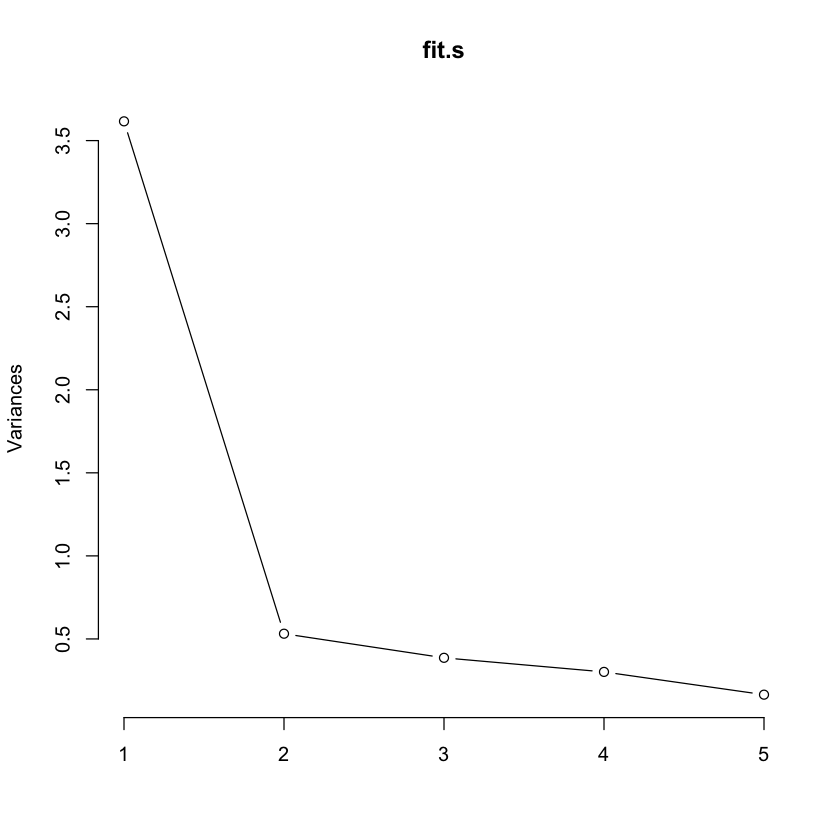

In [11]:
#spree plot
plot.pca = plot(fit.s, type="l") #type="l" is for line plot

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



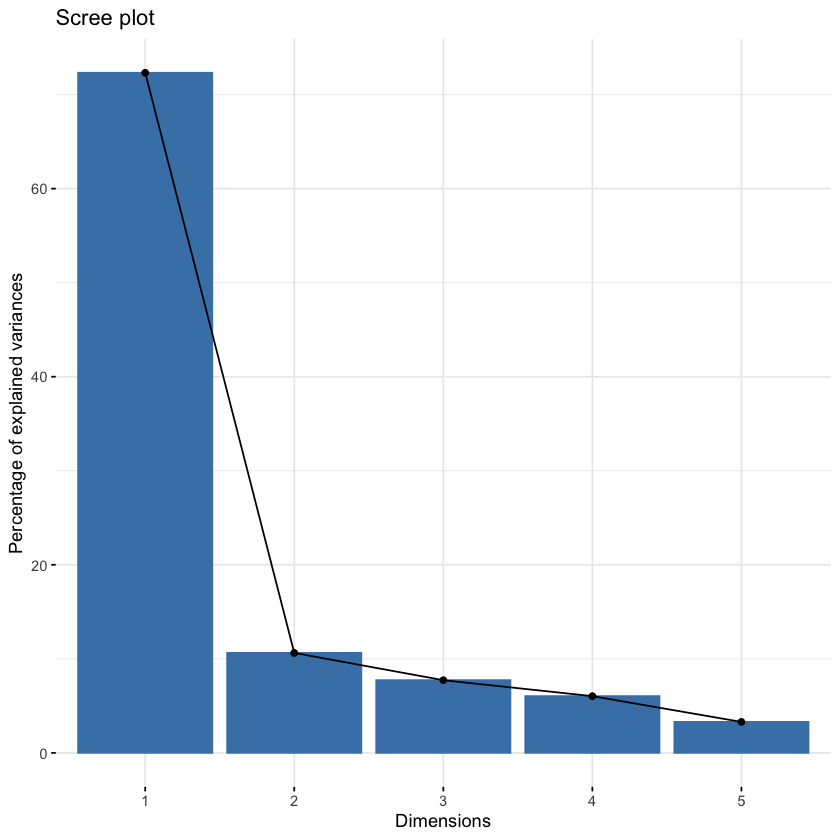

In [12]:
#additional spree plot to visualize the result of PCA
library(factoextra)
fviz_eig(fit.s)


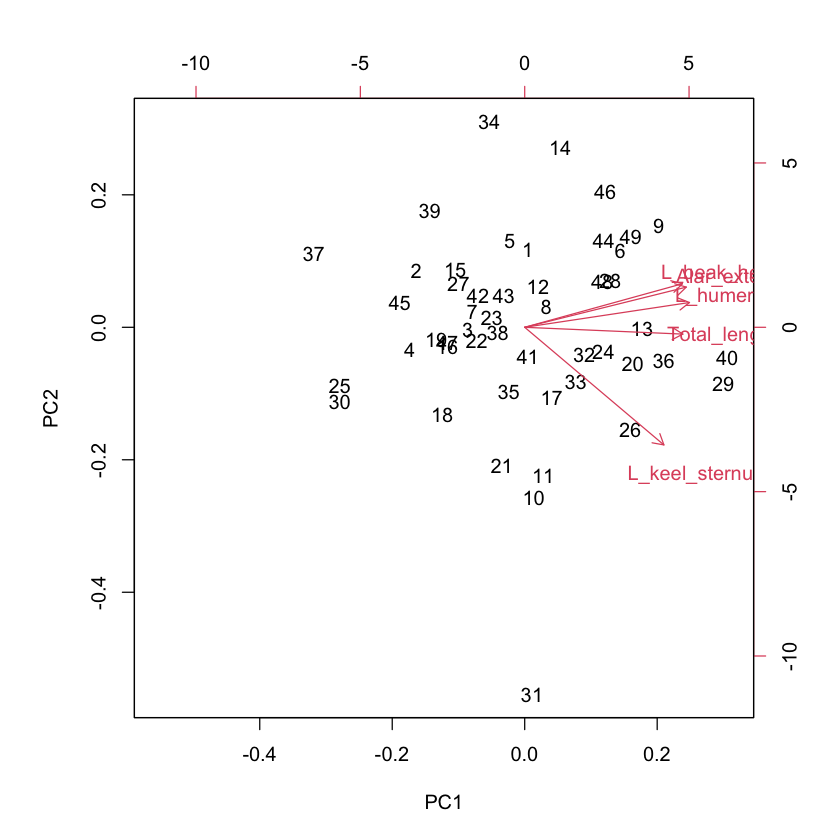

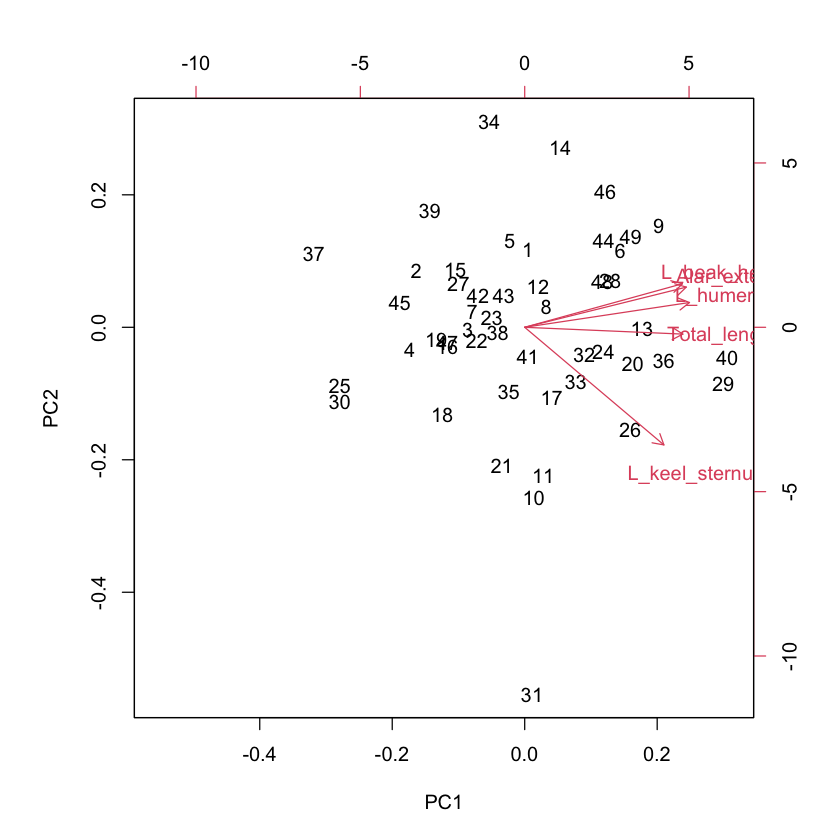

In [13]:
#biplot()

biplot(fit.s) 

biplot(fit)

#show the relationship between the variables in terms of PC1 and PC2